In [1]:
import json

f = open('test_videodatainfo.json')
 

data = json.load(f)

f.close()

In [2]:
from transformers import ViTFeatureExtractor

In [11]:
import matplotlib.pyplot as plt
from tqdm import  tqdm

In [4]:
data['videos']


[{'category': 10,
  'url': 'https://www.youtube.com/watch?v=Sa4BUsvAcjc',
  'video_id': 'video7010',
  'start time': 401.51,
  'end time': 419.65,
  'split': 'test',
  'id': 7010},
 {'category': 9,
  'url': 'https://www.youtube.com/watch?v=2Poaq62Wrvk',
  'video_id': 'video7011',
  'start time': 426.17,
  'end time': 439.49,
  'split': 'test',
  'id': 7011},
 {'category': 5,
  'url': 'https://www.youtube.com/watch?v=wuhJ-GkRRQc',
  'video_id': 'video7012',
  'start time': 418.63,
  'end time': 433.31,
  'split': 'test',
  'id': 7012},
 {'category': 5,
  'url': 'https://www.youtube.com/watch?v=1B7b7VnG2t0',
  'video_id': 'video7013',
  'start time': 30.9,
  'end time': 44.5,
  'split': 'test',
  'id': 7013},
 {'category': 14,
  'url': 'https://www.youtube.com/watch?v=pQQ24JwtRUI',
  'video_id': 'video7014',
  'start time': 132.13,
  'end time': 143.97,
  'split': 'test',
  'id': 7014},
 {'category': 7,
  'url': 'https://www.youtube.com/watch?v=rSYRh2ACa9Y',
  'video_id': 'video7015',
  

In [3]:
data['sentences']

[{'caption': 'a band performing in a small club',
  'video_id': 'video7960',
  'sen_id': 140200},
 {'caption': 'a band preforms a song',
  'video_id': 'video7960',
  'sen_id': 140201},
 {'caption': 'a clip showing a young man play the guitar and performing',
  'video_id': 'video7960',
  'sen_id': 140202},
 {'caption': 'a group of boys and girls are dancing',
  'video_id': 'video7960',
  'sen_id': 140203},
 {'caption': 'a group of people kids dancing and playing music',
  'video_id': 'video7960',
  'sen_id': 140204},
 {'caption': 'a group of people performing a song',
  'video_id': 'video7960',
  'sen_id': 140205},
 {'caption': 'a guitar player jams while dancers get down',
  'video_id': 'video7960',
  'sen_id': 140206},
 {'caption': 'a man gets down with a guitar then throws it away',
  'video_id': 'video7960',
  'sen_id': 140207},
 {'caption': 'a man is playing guitar',
  'video_id': 'video7960',
  'sen_id': 140208},
 {'caption': 'a man is playing the guitar on stage',
  'video_id': '

In [5]:
import torchvision
import torch as th
from s3dg import S3D

In [105]:
vid=torchvision.io.read_video('TrainValVideo/video32.mp4')

In [106]:
vid[0].shape

torch.Size([275, 240, 320, 3])

In [107]:
vid=th.permute(vid[0],(3,0,1,2))

In [108]:
samp=th.linspace(0,vid.shape[2]-1,49,dtype=th.long)
vid=vid[:,samp,:,:]

In [109]:


# # Instantiate the model
# net = S3D('s3d_dict.npy', 512)

# # Load the model weights
# net.load_state_dict(th.load('s3d_howto100m.pth'))

# # Video input should be of size Batch x 3 x T x H x W and normalized to [0, 1] 
# # video = th.rand(2, 3, 31, 226, 224)

# # Evaluation mode
# net = net.eval()
 
# # Video inference
# video_output = net(vid)

# # Text inference
# # text_output = net.text_module(['open door', 'cut tomato'])

In [110]:
# video_output['video_embedding'].shape

In [111]:
# num_frames=40

In [112]:
# # Instantiate the model
# net = S3D('s3d_dict.npy', 512)
# # Load the model weights
# net.load_state_dict(th.load('s3d_howto100m.pth'))
# # Evaluation mode
# net = net.eval()


In [113]:
# im_v=th.cat((vid[:,0,:,:],
#              vid[:,1,:,:],
#              vid[:,2,:,:],
#              vid[:,3,:,:],
#              vid[:,4,:,:],
#              vid[:,5,:,:],
#              vid[:,6,:,:]),2)

In [114]:
# im_v=th.cat((vid[:,7,:,:],
#              vid[:,8,:,:],
#              vid[:,9,:,:],
#              vid[:,10,:,:],
#              vid[:,11,:,:],
#              vid[:,12,:,:],
#              vid[:,13,:,:]),2)

In [115]:
# im_v=th.cat((vid[:,14,:,:],
#              vid[:,15,:,:],
#              vid[:,16,:,:],
#              vid[:,17,:,:],
#              vid[:,18,:,:],
#              vid[:,19,:,:],
#              vid[:,20,:,:]),2)

In [116]:
vid.shape

torch.Size([3, 49, 240, 320])

In [117]:
from PIL import Image

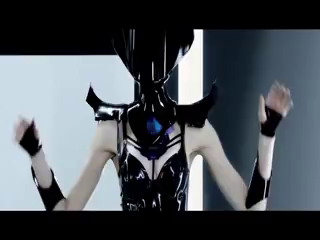

In [118]:
Image.fromarray(th.permute(vid[:,0,:,:],(1,2,0)).numpy())

In [8]:
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch32-224-in21k")


In [120]:
im_l=list()
for i in range(vid.shape[1]):
    im_l.append(vid[:,i,:,:])

In [121]:
inputs = feature_extractor(im_l, return_tensors="pt")

In [122]:
inputs=inputs['pixel_values']

In [123]:
im_h=list()
for i in range(7):
    im_v=th.cat((inputs[0+i*7,:,:,:],
             inputs[1+i*7,:,:,:],
             inputs[2+i*7,:,:,:],
             inputs[3+i*7,:,:,:],
             inputs[4+i*7,:,:,:],
             inputs[5+i*7,:,:,:],
             inputs[6+i*7,:,:,:]),2)
    im_h.append(im_v)

In [124]:
th.cat(im_h,1).shape

torch.Size([3, 1568, 1568])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


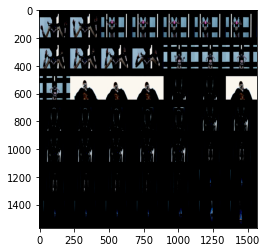

In [125]:
plt.imshow(th.permute(th.cat(im_h,1),(1,2,0)))

In [101]:
im_h[0].dtype

torch.float32

In [6]:
import torchvision.transforms.functional as fn

In [126]:
resize = fn.resize(th.cat(im_h,1), size=[224])

In [127]:
resize.shape


torch.Size([3, 224, 224])

In [128]:
resize

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


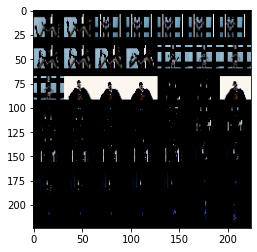

In [129]:
plt.imshow(th.permute(resize,(1,2,0)))

In [12]:
a=list()
for i in tqdm(data['videos']):
    vid=torchvision.io.read_video('TestVideo/'+i['video_id']+'.mp4')
    vid=th.permute(vid[0],(3,0,1,2))
    samp=th.linspace(0,vid.shape[1]-1,49,dtype=th.long)
    vid=vid[:,samp,:,:]
    
    im_l=list()
    for i in range(vid.shape[1]):
        im_l.append(vid[:,i,:,:])

    inputs = feature_extractor(im_l, return_tensors="pt")

    inputs=inputs['pixel_values']

    im_h=list()
    for i in range(7):
        im_v=th.cat((inputs[0+i*7,:,:,:],
                 inputs[1+i*7,:,:,:],
                 inputs[2+i*7,:,:,:],
                 inputs[3+i*7,:,:,:],
                 inputs[4+i*7,:,:,:],
                 inputs[5+i*7,:,:,:],
                 inputs[6+i*7,:,:,:]),2)
        im_h.append(im_v)
    resize = fn.resize(th.cat(im_h,1), size=[224])
#     plt.imshow(th.permute(resize,(1,2,0)).float())
#     plt.show()
    a.append(resize)

100%|███████████████████████████████████████| 2990/2990 [26:55<00:00,  1.85it/s]


In [104]:
# a=list()
# for i in data['videos']:
#     vid=torchvision.io.read_video('TestVideo/'+i['video_id']+'.mp4')
#     vid=th.unsqueeze(th.permute(vid[0],(3,0,1,2)),0)
#     samp=th.linspace(0,vid.shape[2]-1,num_frames,dtype=th.long)
#     vid=vid[:,:,samp,:,:]/255
#     a.append(net(vid)['video_embedding'].detach())

In [13]:
len(a)

2990

In [16]:
b=th.stack(a)

In [17]:
b.shape

torch.Size([2990, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


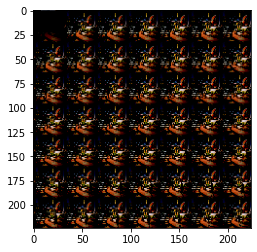

In [21]:
plt.imshow(th.permute(b[2000],(1,2,0)))

In [22]:
th.save(b,'test.pt')

In [24]:
th.load('test.pt').shape

torch.Size([2990, 3, 224, 224])

In [28]:
import json

f = open('train_val_annotation/train_val_videodatainfo.json')
 

data = json.load(f)

f.close()

In [29]:
a=list()
for i in tqdm(data['videos']):
    vid=torchvision.io.read_video('TrainValVideo/'+i['video_id']+'.mp4')
    vid=th.permute(vid[0],(3,0,1,2))
    samp=th.linspace(0,vid.shape[1]-1,49,dtype=th.long)
    vid=vid[:,samp,:,:]
    
    im_l=list()
    for i in range(vid.shape[1]):
        im_l.append(vid[:,i,:,:])

    inputs = feature_extractor(im_l, return_tensors="pt")

    inputs=inputs['pixel_values']

    im_h=list()
    for i in range(7):
        im_v=th.cat((inputs[0+i*7,:,:,:],
                 inputs[1+i*7,:,:,:],
                 inputs[2+i*7,:,:,:],
                 inputs[3+i*7,:,:,:],
                 inputs[4+i*7,:,:,:],
                 inputs[5+i*7,:,:,:],
                 inputs[6+i*7,:,:,:]),2)
        im_h.append(im_v)
    resize = fn.resize(th.cat(im_h,1), size=[224])
#     plt.imshow(th.permute(resize,(1,2,0)).float())
#     plt.show()
    a.append(resize)

100%|█████████████████████████████████████| 7010/7010 [1:26:55<00:00,  1.34it/s]


In [30]:
b=th.stack(a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


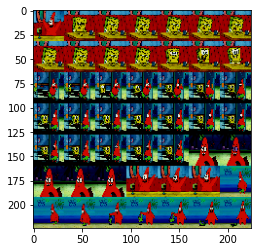

In [31]:
plt.imshow(th.permute(b[2000],(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


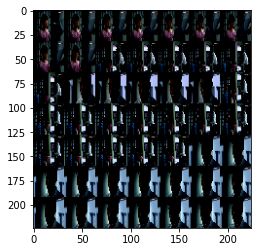

In [34]:
plt.imshow(th.permute(b[20],(1,2,0)))

In [32]:
th.save(b,'train.pt')